In [111]:
from keras.utils import np_utils
import numpy as np
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from PIL import Image
import os, glob
import numpy as np
import random, math
import os
import cv2
from keras.preprocessing import image

In [148]:
categories = ['ハロネン前大統領', '近藤春奈', '門野卓三', 'マイケルムーア監督', 'シュレック', 'ステラおばさん']

In [6]:
path = os.path.abspath('../')

In [21]:
train = os.path.join(path + '\\train')
test = os.path.join(path + '\\test')

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=(150,150),
                                                   class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test,
                                                    target_size=(150,150),
                                                   class_mode='categorical')

Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(6,activation="sigmoid"))

In [53]:
model.compile(loss="binary_crossentropy",
              optimizer= 'adam',
              metrics=["acc"])

In [54]:
model = model.fit_generator(train_generator,
                   steps_per_epoch=100,
                   epochs=10,
                   validation_data=validation_generator,
                   validation_steps=100)

Epoch 1/10
100/100 [==============================] - 211s 2s/step - loss: 0.4003 - acc: 0.8417 - val_loss: 0.2995 - val_acc: 0.8722
Epoch 2/10
100/100 [==============================] - 174s 2s/step - loss: 0.2142 - acc: 0.9109 - val_loss: 0.3958 - val_acc: 0.8847
Epoch 3/10
100/100 [==============================] - 167s 2s/step - loss: 0.1382 - acc: 0.9476 - val_loss: 0.0997 - val_acc: 0.9347
Epoch 4/10
100/100 [==============================] - 199s 2s/step - loss: 0.0864 - acc: 0.9665 - val_loss: 0.0486 - val_acc: 0.9681
Epoch 5/10
100/100 [==============================] - 172s 2s/step - loss: 0.0761 - acc: 0.9727 - val_loss: 0.0514 - val_acc: 0.9542
Epoch 6/10
100/100 [==============================] - 161s 2s/step - loss: 0.0557 - acc: 0.9791 - val_loss: 0.5540 - val_acc: 0.9653
Epoch 7/10
100/100 [==============================] - 156s 2s/step - loss: 0.0426 - acc: 0.9848 - val_loss: 0.2601 - val_acc: 0.9708
Epoch 8/10
100/100 [==============================] - 170s 2s/step - 

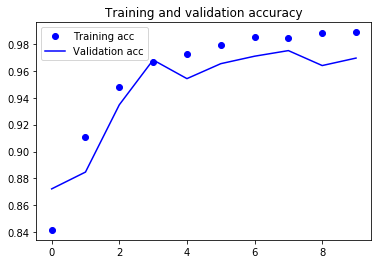

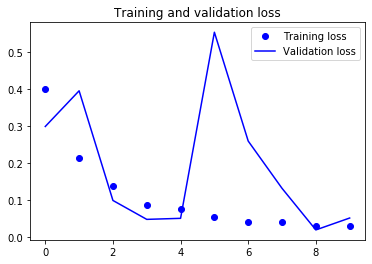

In [55]:
import matplotlib.pyplot as plt

acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('data_accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_value')

ValueError: `y` argument is not supported when data isa generator or Sequence instance. Instead pass targets as the second element of the generator.

In [58]:
with open('model.pickle', mode='wb') as f:  # with構文でファイルパスとバイナリ書き込みモードを設定
    pickle.dump(model, f)

In [141]:
with open('model.pickle', mode='rb') as f:
    model = pickle.load(f)

In [142]:
path = os.path.abspath('../')
path = os.path.join(path + '\\try')

In [143]:
image = Image.open(path+'\\シュレック.jpg')
image = np.asarray(image)
image = image[np.newaxis,:,:,:]
image = np.resize(image,(1,150,150,3))

In [144]:
predict1 = model.model.predict(image)

シュレックじゃねえよ！


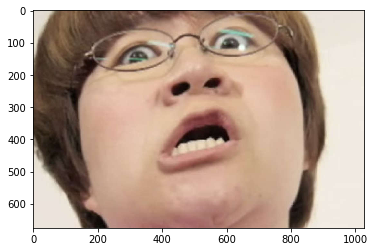

In [149]:
image_haruna = Image.open(path+'\\haruna_basic.jpg')
image_haruna = np.asarray(image_haruna)
plt.imshow(image_haruna)
if predict1[0,2] == 1:
    print('間違えろよ！')
else:
    for i in range(6):
        if predict1[0,i] == 1:
            print(categories[i] + 'じゃねえよ！')

3

0